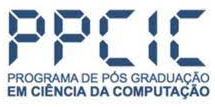

#### 1.1.Importando as bibliotecas

**CEFET-RJ - PPCIC**

Etapa 1 - TCE - Análise Exporatório do Dataset de Notas de Empenho

**Prof**. Eduardo Bezerra

###Preprocessamento



In [1]:
#!pip install pandas_profiling

In [1]:
import csv
#from google.colab import data_table
import itertools
import re
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.backends.backend_pdf import PdfPages
import math
from math import sqrt
import numpy as np
import pandas as pd
from scipy import spatial
import seaborn as sns
import unicodedata
import string as str

####1.2.Acessando o dataset de Nota de Empenho fornecidos pelo TCE-RJ

In [2]:
#Criando o dataset a partir do arquivo rpt fornecido pelo TCE-RJ
#Fazendo o download do dataset
#url = 'https://drive.google.com/file/d/1DeGWehzJ4JxnsEZ_TGnCGu6VeSXhx1DI/view?usp=sharing'
#path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
header_list = ['IdEmpenho', 'Ano', 'Vlr_AnulacaoEmpenho', 'CdFonteTCE', 'CdFonteUG', 'CNPJRaiz', 'CPFCNPJCredorQtNrs', 'CPFCNPJCredor', 'Credor', 'DtEmpenho', 'DEFonteTCE', 'DEFonteUG', 'DEPrograma', 'DEProjAtiv', 'DtAnomes', 'Elemento', 'ElemDespesaTCE', 'ElemDespesaUG', 'Ente', 'Esfera', 'Funcao', 'Historico', 'IdContrato', 'IdFonte', 'IdFuncao', 'Id_Orgao', 'IdPrograma', 'IdSubFuncao', 'IdUnid', 'IdOrgao', 'IdUnidOrcamentaria', 'NrFonte', 'NrFonteUG', 'NrLicitacao', 'NrProjAtiv', 'NrEmpenho', 'ProgTrab', 'ProgTrabRed', 'ProjAtiv', 'SubFuncao', 'Tp_Empenho', 'Unidade', 'Vlr_Empenho', 'Vlr_Anul_Liquidacao', 'Vlr_Liquidacao', 'Vlr_Pagto', 'Vlr_Retencao', 'Vlr_SubEmpenho', 'Vlr_Empenhado', 'Vlr_Liquidado', 'Vlr_Pago']
cols = [28, 12, 23, 14, 13, 10, 27, 21, 101, 28, 131, 31, 51, 256, 12, 61, 181, 101, 31, 7, 51, 256, 31, 61, 61, 14, 12, 61, 12, 61, 91, 31, 31, 31, 13, 15, 51, 31, 181, 101, 21, 101, 23, 26, 23, 23, 23, 23, 23, 23, 22]
#tce = pd.read_fwf(path, skiprows=2, names=header_list, widths=cols)
tce = pd.read_fwf('empenhos_ivson.rpt', skiprows=2, names=header_list, widths=cols)
tce

,IdEmpenho,Ano,Vlr_AnulacaoEmpenho,CdFonteTCE,CdFonteUG,CNPJRaiz,CPFCNPJCredorQtNrs,CPFCNPJCredor,Credor,DtEmpenho,...,Unidade,Vlr_Empenho,Vlr_Anul_Liquidacao,Vlr_Liquidacao,Vlr_Pagto,Vlr_Retencao,Vlr_SubEmpenho,Vlr_Empenhado,Vlr_Liquidado,Vlr_Pago
0,NaN,2018.0,"90,52",100.0,NaN,00000000,14.0,00000000004774,Banco Do Brasil S.a.,2018-01-10 00:00:00.000,...,FESP-FUNDACAO ESCOLA SERVICO PUBLICO (EXTINTO),"8067,73",0,"101467,32","91297,14",0,NaN,"7977,21",NaN,"91297,14"
1,NaN,2018.0,0,100.0,NaN,00000000,14.0,00000000004774,Banco Do Brasil S.a.,2018-02-26 00:00:00.000,...,FESP-FUNDACAO ESCOLA SERVICO PUBLICO (EXTINTO),"7526,16",0,0,0,0,NaN,"7526,16",NaN,0
2,NaN,2018.0,0,100.0,NaN,00000000,14.0,00000000004774,Banco Do Brasil S.a.,2018-03-23 00:00:00.000,...,FESP-FUNDACAO ESCOLA SERVICO PUBLICO (EXTINTO),180,0,0,0,0,NaN,180,NaN,0
3,NaN,2018.0,0,100.0,NaN,00000000,14.0,00000000004774,Banco Do Brasil S.a.,2018-03-23 00:00:00.000,...,FESP-FUNDACAO ESCOLA SERVICO PUBLICO (EXTINTO),"7352,03",0,0,0,0,NaN,"7352,03",NaN,0
4,NaN,2018.0,0,100.0,NaN,00000000,14.0,00000000004774,Banco Do Brasil S.a.,2018-04-25 00:00:00.000,...,FESP-FUNDACAO ESCOLA SERVICO PUBLICO (EXTINTO),"7528,1",0,0,0,0,NaN,"7528,1",NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1863229,202100581043500010000000001,2021.0,0,0.0,2.0,30736475,14.0,30736475000101,PROCURADORES MUNICIPAIS - FURPGM,2021-06-02 00:00:00.000,...,timativo FUNDO REAPARELHAM PGM CACHO...,9900,0 0,2805,"0,47 2805","0,47 0",0,9900,0 2805,"0,47 280"
1863230,202100581043500010000000002,2021.0,0,0.0,2.0,60746948,14.0,60746948228806,BRADESCO S.A.,2021-06-30 00:00:00.000,...,ativo FUNDO REAPARELHAM PGM CACHOEIR...,999,0,"998,2","998,2",0,0,999,"998,2","998,2"
1863231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1863232,(1863231 linhas afetadas),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#eliminando a última linha vez que é um totalizador 
tce = tce.drop(1863231)

In [6]:
#conhecendo os dados do último registro
tce.iloc[-1]

IdEmpenho              NaN
Ano                    NaN
Vlr_AnulacaoEmpenho    NaN
CdFonteTCE             NaN
CdFonteUG              NaN
CNPJRaiz               NaN
CPFCNPJCredorQtNrs     NaN
CPFCNPJCredor          NaN
Credor                 NaN
DtEmpenho              NaN
DEFonteTCE             NaN
DEFonteUG              NaN
DEPrograma             NaN
DEProjAtiv             NaN
DtAnomes               NaN
Elemento               NaN
ElemDespesaTCE         NaN
ElemDespesaUG          NaN
Ente                   NaN
Esfera                 NaN
Funcao                 NaN
Historico              NaN
IdContrato             NaN
IdFonte                NaN
IdFuncao               NaN
Id_Orgao               NaN
IdPrograma             NaN
IdSubFuncao            NaN
IdUnid                 NaN
IdOrgao                NaN
IdUnidOrcamentaria     NaN
NrFonte                NaN
NrFonteUG              NaN
NrLicitacao            NaN
NrProjAtiv             NaN
NrEmpenho              NaN
ProgTrab               NaN
P

In [7]:
#verificando os tipos de dados do dataset
tce.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1863233 entries, 0 to 1863233
Data columns (total 51 columns):
 #   Column               Dtype  
---  ------               -----  
 0   IdEmpenho            object 
 1   Ano                  float64
 2   Vlr_AnulacaoEmpenho  object 
 3   CdFonteTCE           float64
 4   CdFonteUG            float64
 5   CNPJRaiz             object 
 6   CPFCNPJCredorQtNrs   float64
 7   CPFCNPJCredor        object 
 8   Credor               object 
 9   DtEmpenho            object 
 10  DEFonteTCE           object 
 11  DEFonteUG            object 
 12  DEPrograma           object 
 13  DEProjAtiv           object 
 14  DtAnomes             object 
 15  Elemento             object 
 16  ElemDespesaTCE       object 
 17  ElemDespesaUG        object 
 18  Ente                 object 
 19  Esfera               object 
 20  Funcao               object 
 21  Historico            object 
 22  IdContrato           object 
 23  IdFonte              object 
 24

In [8]:
#convertendo a formatação da DtEmpenho
tce.DtEmpenho = pd.to_datetime(tce.DtEmpenho, format="%Y-%m-%d")

In [8]:
#analisando os dados e atribuindo a melhor formatação automática dada pelo Pandas
tce = tce.convert_dtypes()

In [9]:
#verificando o resultado de tipos
tce.info()

#observando os dados para um registro
tce.loc[1863230]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863231 entries, 0 to 1863230
Data columns (total 51 columns):
 #   Column               Dtype         
---  ------               -----         
 0   IdEmpenho            string        
 1   Ano                  Int64         
 2   Vlr_AnulacaoEmpenho  string        
 3   CdFonteTCE           Int64         
 4   CdFonteUG            Int64         
 5   CNPJRaiz             string        
 6   CPFCNPJCredorQtNrs   Int64         
 7   CPFCNPJCredor        string        
 8   Credor               string        
 9   DtEmpenho            datetime64[ns]
 10  DEFonteTCE           string        
 11  DEFonteUG            string        
 12  DEPrograma           string        
 13  DEProjAtiv           string        
 14  DtAnomes             Int64         
 15  Elemento             Float64       
 16  ElemDespesaTCE       string        
 17  ElemDespesaUG        string        
 18  Ente                 string        
 19  Esfera               

IdEmpenho                                    202100581043500010000000002
Ano                                                                 2021
Vlr_AnulacaoEmpenho                                                    0
CdFonteTCE                                                             0
CdFonteUG                                                              2
CNPJRaiz                                                        60746948
CPFCNPJCredorQtNrs                                                    14
CPFCNPJCredor                                             60746948228806
Credor                                                     BRADESCO S.A.
DtEmpenho                                            2021-06-30 00:00:00
DEFonteTCE                                           RECURSOS ORDINÁRIOS
DEFonteUG                                                         FURPGM
DEPrograma                                          APOIO ADMINISTRATIVO
DEProjAtiv             MANUTENÇÃO DO FUNDO DE REAPA

In [10]:
#conferindo o resultado final
tce.info()

#observando os dados para um registro
tce.loc[1863230]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863231 entries, 0 to 1863230
Data columns (total 51 columns):
 #   Column               Dtype         
---  ------               -----         
 0   IdEmpenho            string        
 1   Ano                  Int64         
 2   Vlr_AnulacaoEmpenho  string        
 3   CdFonteTCE           Int64         
 4   CdFonteUG            Int64         
 5   CNPJRaiz             string        
 6   CPFCNPJCredorQtNrs   Int64         
 7   CPFCNPJCredor        string        
 8   Credor               string        
 9   DtEmpenho            datetime64[ns]
 10  DEFonteTCE           string        
 11  DEFonteUG            string        
 12  DEPrograma           string        
 13  DEProjAtiv           string        
 14  DtAnomes             Int64         
 15  Elemento             Float64       
 16  ElemDespesaTCE       string        
 17  ElemDespesaUG        string        
 18  Ente                 string        
 19  Esfera               

IdEmpenho                                    202100581043500010000000002
Ano                                                                 2021
Vlr_AnulacaoEmpenho                                                    0
CdFonteTCE                                                             0
CdFonteUG                                                              2
CNPJRaiz                                                        60746948
CPFCNPJCredorQtNrs                                                    14
CPFCNPJCredor                                             60746948228806
Credor                                                     BRADESCO S.A.
DtEmpenho                                            2021-06-30 00:00:00
DEFonteTCE                                           RECURSOS ORDINÁRIOS
DEFonteUG                                                         FURPGM
DEPrograma                                          APOIO ADMINISTRATIVO
DEProjAtiv             MANUTENÇÃO DO FUNDO DE REAPA

####1.3. Tratando valores ausentes do dataset

In [11]:
#verificando valores ausentes
tce.isnull()

,IdEmpenho,Ano,Vlr_AnulacaoEmpenho,CdFonteTCE,CdFonteUG,CNPJRaiz,CPFCNPJCredorQtNrs,CPFCNPJCredor,Credor,DtEmpenho,...,Unidade,Vlr_Empenho,Vlr_Anul_Liquidacao,Vlr_Liquidacao,Vlr_Pagto,Vlr_Retencao,Vlr_SubEmpenho,Vlr_Empenhado,Vlr_Liquidado,Vlr_Pago
0,True,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
1,True,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
2,True,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
3,True,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
4,True,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1863226,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1863227,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1863228,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1863229,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
#acima identificamos que todos os registros possuem algum tipo de informação ausente
#a seguir identificaremos a quantidade de valores ausentes por coluna
tce.isnull().sum()

IdEmpenho               377871
Ano                          0
Vlr_AnulacaoEmpenho          0
CdFonteTCE                1144
CdFonteUG               377871
CNPJRaiz                     0
CPFCNPJCredorQtNrs           0
CPFCNPJCredor                0
Credor                       0
DtEmpenho                    0
DEFonteTCE                1144
DEFonteUG               377871
DEPrograma                   0
DEProjAtiv              377871
DtAnomes                     0
Elemento                     0
ElemDespesaTCE            2322
ElemDespesaUG           377872
Ente                         0
Esfera                       0
Funcao                       0
Historico                  624
IdContrato                   0
IdFonte                      0
IdFuncao                     0
Id_Orgao                377871
IdPrograma                   0
IdSubFuncao                  0
IdUnid                       0
IdOrgao                      0
IdUnidOrcamentaria     1485360
NrFonte                   1144
NrFonteU

In [13]:
#observamos que há um deficit para a série 'IdUnidOrcamentaria'
#além de um subconjunto de 377.871 registros que com inúmeras séries sem informação
#vamos conhecer a relevância dessas ausências para o dataset
tce.isnull().sum() / tce.shape[0]

IdEmpenho              0.202804
Ano                    0.000000
Vlr_AnulacaoEmpenho    0.000000
CdFonteTCE             0.000614
CdFonteUG              0.202804
CNPJRaiz               0.000000
CPFCNPJCredorQtNrs     0.000000
CPFCNPJCredor          0.000000
Credor                 0.000000
DtEmpenho              0.000000
DEFonteTCE             0.000614
DEFonteUG              0.202804
DEPrograma             0.000000
DEProjAtiv             0.202804
DtAnomes               0.000000
Elemento               0.000000
ElemDespesaTCE         0.001246
ElemDespesaUG          0.202805
Ente                   0.000000
Esfera                 0.000000
Funcao                 0.000000
Historico              0.000335
IdContrato             0.000000
IdFonte                0.000000
IdFuncao               0.000000
Id_Orgao               0.202804
IdPrograma             0.000000
IdSubFuncao            0.000000
IdUnid                 0.000000
IdOrgao                0.000000
IdUnidOrcamentaria     0.797196
NrFonte 

In [14]:
#Considerando que 79% dos registros não possui informação de 'IdUnidOrcamentaria'
#criaremos dataset sem essa série
tce_clean = tce.drop(columns=['IdUnidOrcamentaria'])

In [15]:
#identificando as colunas com os valores, vez que permaneceram como objeto/string
tce_clean.filter(like='Vlr')

,Vlr_AnulacaoEmpenho,Vlr_Empenho,Vlr_Anul_Liquidacao,Vlr_Liquidacao,Vlr_Pagto,Vlr_Retencao,Vlr_SubEmpenho,Vlr_Empenhado,Vlr_Liquidado,Vlr_Pago
0,"90,52","8067,73",0,"101467,32","91297,14",0,<NA>,"7977,21",<NA>,"91297,14"
1,0,"7526,16",0,0,0,0,<NA>,"7526,16",<NA>,0
2,0,180,0,0,0,0,<NA>,180,<NA>,0
3,0,"7352,03",0,0,0,0,<NA>,"7352,03",<NA>,0
4,0,"7528,1",0,0,0,0,<NA>,"7528,1",<NA>,0
...,...,...,...,...,...,...,...,...,...,...
1863226,0,1800,0,1800,0,0,0,1800,1800,0
1863227,0,1800,0,1800,0,0,0,1800,1800,0
1863228,0,1800,0,1800,0,0,0,1800,1800,0
1863229,0,99000,0,"28050,47","28050,47",0,0,99000,"28050,47","28050,47"


In [16]:
#corrigindo a formatação das colunas de valores
for col in tce_clean.filter(like='Vlr').columns: #filtrando/restringindo a execução
#    tce_clean[col] = tce_clean[col].astype(str) #convertendo em string obs.: já consta naturalmente como string
    tce_clean[col] = tce_clean[col].str.replace(',','.') #substituindo virgulas por pontos
    tce_clean[col] = pd.to_numeric(tce_clean[col], errors='coerce') #convertendo em numérico
    tce_clean[col] = tce_clean[col].replace(np.nan, 0) #substituindo valores ausentes por zero
    tce_clean[col] = tce_clean[col].round(2) #arredondando para 2 casas decimais
    tce_clean[col] = tce_clean[col].abs() #tornando os valores absolutos
#exibindo as colunas de valores corrigidos    
tce_clean.filter(like='Vlr')

,Vlr_AnulacaoEmpenho,Vlr_Empenho,Vlr_Anul_Liquidacao,Vlr_Liquidacao,Vlr_Pagto,Vlr_Retencao,Vlr_SubEmpenho,Vlr_Empenhado,Vlr_Liquidado,Vlr_Pago
0,90.52,8067.73,0.0,101467.32,91297.14,0.0,0.0,7977.21,0.00,91297.14
1,0.00,7526.16,0.0,0.00,0.00,0.0,0.0,7526.16,0.00,0.00
2,0.00,180.00,0.0,0.00,0.00,0.0,0.0,180.00,0.00,0.00
3,0.00,7352.03,0.0,0.00,0.00,0.0,0.0,7352.03,0.00,0.00
4,0.00,7528.10,0.0,0.00,0.00,0.0,0.0,7528.10,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
1863226,0.00,1800.00,0.0,1800.00,0.00,0.0,0.0,1800.00,1800.00,0.00
1863227,0.00,1800.00,0.0,1800.00,0.00,0.0,0.0,1800.00,1800.00,0.00
1863228,0.00,1800.00,0.0,1800.00,0.00,0.0,0.0,1800.00,1800.00,0.00
1863229,0.00,99000.00,0.0,28050.47,28050.47,0.0,0.0,99000.00,28050.47,28050.47


In [17]:
tce_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863231 entries, 0 to 1863230
Data columns (total 50 columns):
 #   Column               Dtype         
---  ------               -----         
 0   IdEmpenho            string        
 1   Ano                  Int64         
 2   Vlr_AnulacaoEmpenho  float64       
 3   CdFonteTCE           Int64         
 4   CdFonteUG            Int64         
 5   CNPJRaiz             string        
 6   CPFCNPJCredorQtNrs   Int64         
 7   CPFCNPJCredor        string        
 8   Credor               string        
 9   DtEmpenho            datetime64[ns]
 10  DEFonteTCE           string        
 11  DEFonteUG            string        
 12  DEPrograma           string        
 13  DEProjAtiv           string        
 14  DtAnomes             Int64         
 15  Elemento             Float64       
 16  ElemDespesaTCE       string        
 17  ElemDespesaUG        string        
 18  Ente                 string        
 19  Esfera               

In [18]:
#Dentre as demais séries observamos que 20,3% sequer apresenta o número da licitação e
#concomitância com outras séries importantes. Essa condição nos induz a descartar tais registros.
#Nosso objetivo é obter um dataset mais conciso para aplicação de modelos e servir de aprendizado.

#eliminando entradas que possuem valores ausentes para 'NrLicitacao':
tce_clean = tce_clean.dropna(subset=['NrLicitacao'], axis=0)

#comparar o antes e o depois
print("Antes:\t{}".format(tce.shape))
print("Depois:\t{}".format(tce_clean.shape))

Antes:	(1863231, 51)
Depois:	(1485357, 50)


In [19]:
#verificamos quantas séries ainda possuem valores ausentes
tce_clean.isnull().sum()

IdEmpenho                0
Ano                      0
Vlr_AnulacaoEmpenho      0
CdFonteTCE               0
CdFonteUG                0
CNPJRaiz                 0
CPFCNPJCredorQtNrs       0
CPFCNPJCredor            0
Credor                   0
DtEmpenho                0
DEFonteTCE               0
DEFonteUG                0
DEPrograma               0
DEProjAtiv               0
DtAnomes                 0
Elemento                 0
ElemDespesaTCE           1
ElemDespesaUG            1
Ente                     0
Esfera                   0
Funcao                   0
Historico              624
IdContrato               0
IdFonte                  0
IdFuncao                 0
Id_Orgao                 0
IdPrograma               0
IdSubFuncao              0
IdUnid                   0
IdOrgao                  0
NrFonte                  0
NrFonteUG                0
NrLicitacao              0
NrProjAtiv               0
NrEmpenho                0
ProgTrab                 0
ProgTrabRed              0
P

In [20]:
#identificando um registro com dado ausente
NaN = tce_clean['ElemDespesaTCE'].isnull()
positions = np.flatnonzero(NaN)
filtered_df = tce_clean.iloc[positions]
print(filtered_df)

                          IdEmpenho   Ano  Vlr_AnulacaoEmpenho  CdFonteTCE  \
911486  202100010070100910000000030  2021                  0.0           0   

        CdFonteUG  CNPJRaiz  CPFCNPJCredorQtNrs   CPFCNPJCredor  \
911486          1  13444605                  14  13444605000113   

                                                   Credor  DtEmpenho  ...  \
911486  FUNDO DE PREVIDÊNCIA SOCIAL DO MUNICÍPIO DE VOLTA 2021-01-12  ...   

                     Unidade Vlr_Empenho Vlr_Anul_Liquidacao Vlr_Liquidacao  \
911486  CAMARA VOLTA REDONDA     14000.0                 0.0        9152.32   

        Vlr_Pagto  Vlr_Retencao Vlr_SubEmpenho Vlr_Empenhado Vlr_Liquidado  \
911486    9152.32           0.0            0.0       14000.0       9152.32   

       Vlr_Pago  
911486  9152.32  

[1 rows x 50 columns]


In [21]:
#observando o registro
tce_clean.loc[filtered_df.index]

,IdEmpenho,Ano,Vlr_AnulacaoEmpenho,CdFonteTCE,CdFonteUG,CNPJRaiz,CPFCNPJCredorQtNrs,CPFCNPJCredor,Credor,DtEmpenho,...,Unidade,Vlr_Empenho,Vlr_Anul_Liquidacao,Vlr_Liquidacao,Vlr_Pagto,Vlr_Retencao,Vlr_SubEmpenho,Vlr_Empenhado,Vlr_Liquidado,Vlr_Pago
911486,202100010070100910000000030,2021,0.0,0,1,13444605,14,13444605000113,FUNDO DE PREVIDÊNCIA SOCIAL DO MUNICÍPIO DE VOLTA,2021-01-12,...,CAMARA VOLTA REDONDA,14000.0,0.0,9152.32,9152.32,0.0,0.0,14000.0,9152.32,9152.32


In [22]:
bindex = [] #criando lista que receberá os index com valores superiores a 1 bilhão
for col in tce_clean.filter(like='Vlr').columns: #filtrando/restringindo a execução
    mask = tce_clean[col] >= 1000000000 #criando o subset com valor superior para cada coluna
    bilion = tce_clean[mask] #criando o dataset para o subset
    bindex.extend(bilion.index.tolist()) #criando uma lista com os index da coluna filtrada e adicionando na lista
bindex = list(dict.fromkeys(bindex)) #eliminando duplicidades da lista
bindex.sort() #ordenando a lista
print(bindex)

[909479]


In [23]:
tce_clean.loc[909479]

IdEmpenho                                    202100190070000010000000036
Ano                                                                 2021
Vlr_AnulacaoEmpenho                                                  0.0
CdFonteTCE                                                             0
CdFonteUG                                                             15
CNPJRaiz                                                        32512501
CPFCNPJCredorQtNrs                                                    14
CPFCNPJCredor                                             32512501000143
Credor                                     PREFEITURA MUNICIPAL DE VOLTA
DtEmpenho                                            2021-02-08 00:00:00
DEFonteTCE                                           RECURSOS ORDINÁRIOS
DEFonteUG                                              TESOURO MUNICIPAL
DEPrograma                             GESTAO DA ADMINISTRACAO MUNICIPAL
DEProjAtiv                         MANUTENCAO E OPE

In [24]:
#eliminando do dataset os registros com valores acima de 1 bilhão
for row in bindex:
    tce_clean = tce_clean.drop(row)

In [25]:
#eliminando entradas que possuem valores ausentes para 'NrLicitacao':
tce_clean = tce_clean.dropna(subset=['ElemDespesaTCE'], axis=0)
tce_clean = tce_clean.dropna(subset=['ElemDespesaUG'], axis=0)
tce_clean = tce_clean.dropna(subset=['Historico'], axis=0)

#comparar o antes e o depois
print("Antes:\t{}".format(tce.shape))
print("Depois:\t{}".format(tce_clean.shape))

Antes:	(1863231, 51)
Depois:	(1484731, 50)


In [26]:
#observando estatísticas para os valores do dataset
tce_clean.filter(like='Vlr').describe().round(0)

,Vlr_AnulacaoEmpenho,Vlr_Empenho,Vlr_Anul_Liquidacao,Vlr_Liquidacao,Vlr_Pagto,Vlr_Retencao,Vlr_SubEmpenho,Vlr_Empenhado,Vlr_Liquidado,Vlr_Pago
count,1484731.0,1484731.0,1484731.0,1484731.0,1484731.0,1484731.0,1484731.0,1484731.0,1484731.0,1484731.0
mean,14227.0,111338.0,127.0,81574.0,73256.0,8525.0,4123.0,97161.0,85641.0,81776.0
std,416084.0,1423241.0,12755.0,1176540.0,974905.0,273547.0,167366.0,1264446.0,1187962.0,1142835.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,863.0,0.0,240.0,210.0,0.0,0.0,600.0,325.0,223.0
50%,0.0,3497.0,0.0,1855.0,1771.0,0.0,0.0,2900.0,2100.0,1848.0
75%,0.0,19575.0,0.0,11690.0,11151.0,0.0,0.0,16647.0,13104.0,11830.0
max,169999005.0,220688626.0,6037018.0,220688626.0,220688626.0,103091253.0,63000000.0,220688626.0,220688626.0,220688626.0


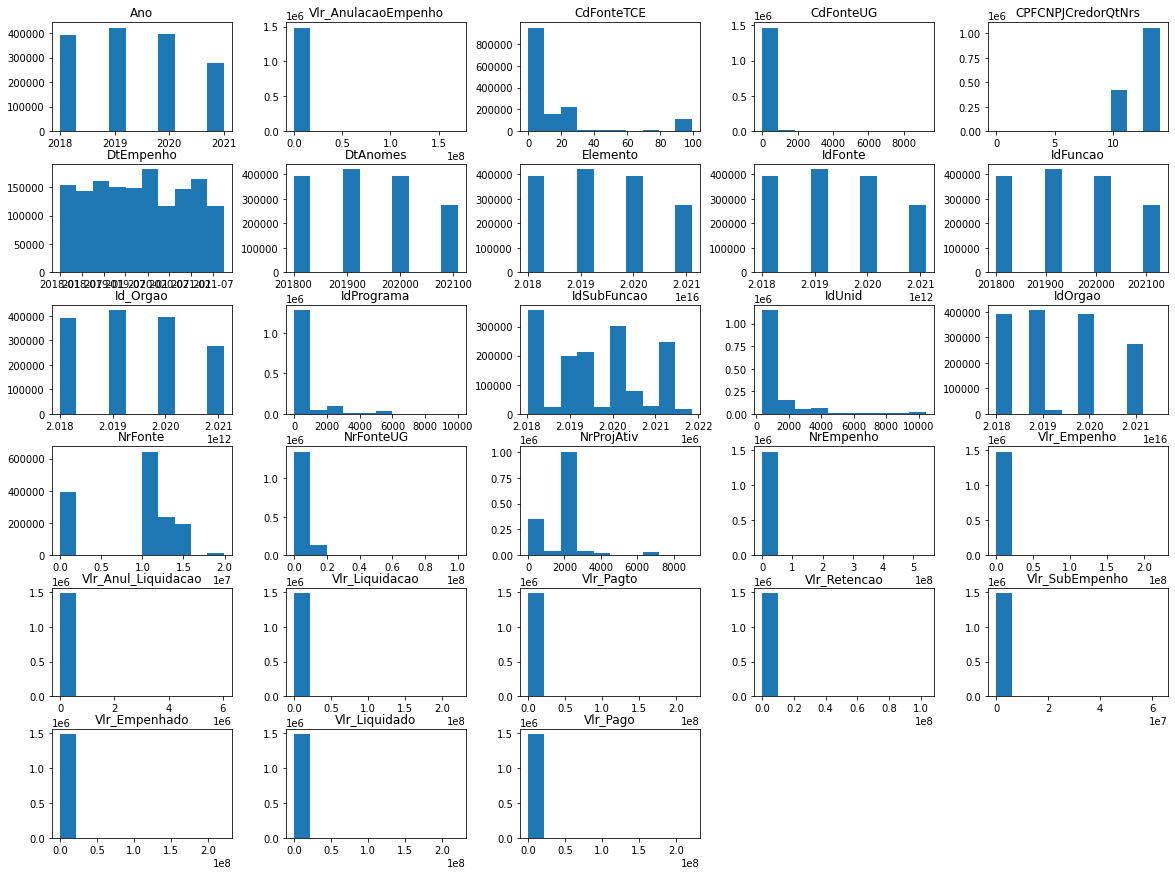

In [27]:
#verificando as distribuições
tce_clean.hist(figsize=(20,15), grid=False);

In [28]:
#identificando os outliers para a variável 'Vlr_Pago'
q1_VlrPago = tce_clean.Vlr_Pago.quantile(.25)
q3_VlrPago = tce_clean.Vlr_Pago.quantile(.75)
IQR_VlrPago = q3_VlrPago - q1_VlrPago
print('IQR da variável VlrPago: ', IQR_VlrPago)

#definindo os limites
sup_VlrPago = q3_VlrPago + 1.5 * IQR_VlrPago
inf_VlrPago = q1_VlrPago - 1.5 * IQR_VlrPago

print('Limite superior VlrPago: ', sup_VlrPago)
print('Limite inferior VlrPago: ', inf_VlrPago)

IQR da variável VlrPago:  11607.485
Limite superior VlrPago:  29241.2275
Limite inferior VlrPago:  -17188.7125


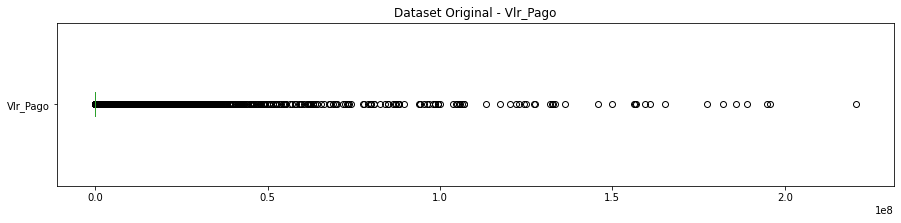

O dataset possui 1484731 entradas
242499 Entradas acima de 29.240,50
Representam 16.33% do dataset


In [29]:
#verificando o conjunto
fig, ax = plt.subplots(figsize=(15,3))
tce_clean.Vlr_Pago.plot(kind='box', vert=False);
ax.set_title('Dataset Original - Vlr_Pago')
plt.show()
print("O dataset possui {} entradas".format(tce_clean.shape[0]))
print("{} Entradas acima de 29.240,50".format(len(tce_clean[tce_clean.Vlr_Pago > 29240.5])))
print("Representam {:.2f}% do dataset".format((len(tce_clean[tce_clean.Vlr_Pago > 29240.5]) / tce_clean.shape[0])*100))

In [30]:
#Credores no dataset
tce_clean.Credor.unique()

<StringArray>
[                    'BANCO DO BRASIL SA',
   'BANCO DO BRASIL S.A - ANGRA DOS REIS',
        'ROSANGELA DE OLIVEIRA RODRIGUES',
                  'LUIS CLAUDIO DA SILVA',
                    'DALVA LEONE PEREIRA',
 'ROSEMARY DOS SANTOS FERNANDES DE SOUZA',
                         'MARCELO CORREA',
                  'JOSE RICARDO FERREIRA',
              'ANITA MARCONDES RODRIGUES',
                          'ALBERTO JORGE',
 ...
                 'SAMUEL ALVES DE AMORIM',
         'ÉRIKA APARECIDA RAMOS CASTILHO',
                 'DILMA BENTO DOS SANTOS',
           'JORGE LUIS CORRÉA DOS SANTOS',
                 'MARIA HELENA DIAS MELO',
                         'SIDNEI VALERIO',
         'RHANDAL JOSé SILVA DE OLIVEIRA',
                 'MARIA DE LOURDES COSTA',
                  'ABRAÃO DA SILVA SOUZA',
       'PROCURADORES MUNICIPAIS - FURPGM']
Length: 127587, dtype: string

In [31]:
#Credores mais frequentes no dataset
tce_clean.Credor.value_counts()

INSTITUTO NACIONAL DO SEGURO SOCIAL                35605
TRIBUNAL DE JUSTIÇA DO ESTADO DO RIO DE JANEIRO    25696
TELEMAR NORTE LESTE S/A. - EM RECUPERACA           13072
AMPLA ENERGIA E SERVIÇOS S.A.                      11243
CAIXA ECONOMICA FEDERAL                            10518
                                                   ...  
ANDERSON BONIFACIO                                     1
VALDEIR FERREIRA FINAMOR                               1
SALVADOR DE ALMEIDA CELESTINO                          1
CASSIA REGINA MAIA LEMOS                               1
PROCURADORES MUNICIPAIS - FURPGM                       1
Name: Credor, Length: 127587, dtype: Int64

In [32]:
# % dos Credores mais frequentes
tce_clean.Credor.value_counts() / tce_clean.shape[0]

INSTITUTO NACIONAL DO SEGURO SOCIAL                0.023981
TRIBUNAL DE JUSTIÇA DO ESTADO DO RIO DE JANEIRO    0.017307
TELEMAR NORTE LESTE S/A. - EM RECUPERACA           0.008804
AMPLA ENERGIA E SERVIÇOS S.A.                      0.007572
CAIXA ECONOMICA FEDERAL                            0.007084
                                                     ...   
ANDERSON BONIFACIO                                 0.000001
VALDEIR FERREIRA FINAMOR                           0.000001
SALVADOR DE ALMEIDA CELESTINO                      0.000001
CASSIA REGINA MAIA LEMOS                           0.000001
PROCURADORES MUNICIPAIS - FURPGM                   0.000001
Name: Credor, Length: 127587, dtype: Float64

In [33]:
# % dos Contratos mais frequentes
tce_clean.IdContrato.value_counts() / tce_clean.shape[0]

0                   0.87151
000366059/2017      0.00024
00042961/2018      0.000197
0038400012/19      0.000195
00388261/2018       0.00017
                     ...   
0014231345/2018    0.000001
002100279/2020     0.000001
002100016/2021     0.000001
0014231183/2019    0.000001
010355003/2021     0.000001
Name: IdContrato, Length: 68263, dtype: Float64

In [34]:
# ver as 5 primeiras ocorrências do Credor
tce_clean.loc[tce_clean['Credor'] == 'INSTITUTO NACIONAL DO SEGURO SOCIAL'].head()

,IdEmpenho,Ano,Vlr_AnulacaoEmpenho,CdFonteTCE,CdFonteUG,CNPJRaiz,CPFCNPJCredorQtNrs,CPFCNPJCredor,Credor,DtEmpenho,...,Unidade,Vlr_Empenho,Vlr_Anul_Liquidacao,Vlr_Liquidacao,Vlr_Pagto,Vlr_Retencao,Vlr_SubEmpenho,Vlr_Empenhado,Vlr_Liquidado,Vlr_Pago
255095,201800200036300140000000067,2018,0.0,0,0,29979036,14,29979036000140,INSTITUTO NACIONAL DO SEGURO SOCIAL,2018-01-02,...,PREFEITURA ANGRA DOS REIS,50536.58,0.0,50536.58,50536.58,0.0,0.0,50536.58,50536.58,50536.58
255096,201800200036300050000000424,2018,0.0,0,0,29979036,14,29979036000140,INSTITUTO NACIONAL DO SEGURO SOCIAL,2018-01-31,...,PREFEITURA ANGRA DOS REIS,191442.26,0.0,191442.26,191442.26,0.0,0.0,191442.26,191442.26,191442.26
255097,201800200036300050000000425,2018,0.0,0,0,29979036,14,29979036000140,INSTITUTO NACIONAL DO SEGURO SOCIAL,2018-01-31,...,PREFEITURA ANGRA DOS REIS,16449.33,0.0,16449.33,16449.33,0.0,0.0,16449.33,16449.33,16449.33
255098,201800200036300140000000507,2018,0.0,0,0,29979036,14,29979036000140,INSTITUTO NACIONAL DO SEGURO SOCIAL,2018-02-09,...,PREFEITURA ANGRA DOS REIS,100955.44,0.0,100955.44,100955.44,0.0,0.0,100955.44,100955.44,100955.44
255099,201800200036300140000000508,2018,0.0,0,0,29979036,14,29979036000140,INSTITUTO NACIONAL DO SEGURO SOCIAL,2018-02-09,...,PREFEITURA ANGRA DOS REIS,11159.73,0.0,11159.73,11159.73,0.0,0.0,11159.73,11159.73,11159.73


In [35]:
#observando alguns dados...

#no exemplo a seguir temos as 3 primeiras entradas para as 4 primeiras colunas
tce_clean.iloc[:3,:4]

,IdEmpenho,Ano,Vlr_AnulacaoEmpenho,CdFonteTCE
247929,202000200036300060000002202,2020,29498.6,0
247930,202100200036300060000000368,2021,0.0,0
247931,201800200036300060000000259,2018,41491.6,0


In [36]:
#preparando a base de treinamento
df_mask = tce_clean['IdContrato']!='0'
tce_train = tce_clean[df_mask]
tce_train

,IdEmpenho,Ano,Vlr_AnulacaoEmpenho,CdFonteTCE,CdFonteUG,CNPJRaiz,CPFCNPJCredorQtNrs,CPFCNPJCredor,Credor,DtEmpenho,...,Unidade,Vlr_Empenho,Vlr_Anul_Liquidacao,Vlr_Liquidacao,Vlr_Pagto,Vlr_Retencao,Vlr_SubEmpenho,Vlr_Empenhado,Vlr_Liquidado,Vlr_Pago
247929,202000200036300060000002202,2020,29498.60,0,2,00000000,14,00000000000191,BANCO DO BRASIL SA,2020-12-22,...,PREFEITURA ANGRA DOS REIS,30000.00,0.0,501.40,501.40,0.0,0.0,501.40,501.40,501.40
247930,202100200036300060000000368,2021,0.00,0,2,00000000,14,00000000000191,BANCO DO BRASIL SA,2021-01-04,...,PREFEITURA ANGRA DOS REIS,100000.00,0.0,24120.06,24120.06,0.0,0.0,100000.00,24120.06,24120.06
248030,202000200036300060000002205,2020,15589.18,0,2,00360305,14,00360305000104,CAIXA ECONOMICA FEDERAL,2020-12-22,...,PREFEITURA ANGRA DOS REIS,15850.00,0.0,260.82,260.82,0.0,0.0,260.82,260.82,260.82
248032,202100200036300060000000377,2021,0.00,0,2,00360305,14,00360305000104,CAIXA ECONOMICA FEDERAL,2021-01-04,...,PREFEITURA ANGRA DOS REIS,100000.00,0.0,91921.97,91921.97,0.0,0.0,100000.00,91921.97,91921.97
248155,201800200036300060000002868,2018,0.00,0,0,00394460,14,00394460010708,MINISTRIO DA FAZENDA,2018-12-18,...,PREFEITURA ANGRA DOS REIS,588497.89,0.0,588497.89,588497.89,0.0,0.0,588497.89,588497.89,588497.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1862853,202100071035507050000000044,2021,0.00,0,30,24398209,11,24398209700,DELSON RODRIGUES FRANCO.,2021-04-01,...,FUN MUNI DE EDUCAÇÃO DE ITALVA,600.00,0.0,0.00,600.00,0.0,600.0,600.00,600.00,600.00
1862856,202100071035507050000000054,2021,0.00,16,35,27429180,11,27429180787,SEBASTIÃO MOREIRA DEVESA,2021-04-27,...,FUN MUNI DE EDUCAÇÃO DE ITALVA,6894.00,0.0,0.00,0.00,0.0,0.0,6894.00,0.00,0.00
1862879,202100071035507050000000042,2021,0.00,61,28,30170134,14,30170134000111,WANDERSON MENDES AZEVEDO.,2021-03-19,...,FUN MUNI DE EDUCAÇÃO DE ITALVA,900.00,0.0,0.00,0.00,0.0,0.0,900.00,0.00,0.00
1862901,202100071035507050000000053,2021,0.00,16,35,71498010,11,71498010725,JOVENINO SOARES CORREA,2021-04-27,...,FUN MUNI DE EDUCAÇÃO DE ITALVA,9800.00,0.0,0.00,0.00,0.0,0.0,9800.00,0.00,0.00


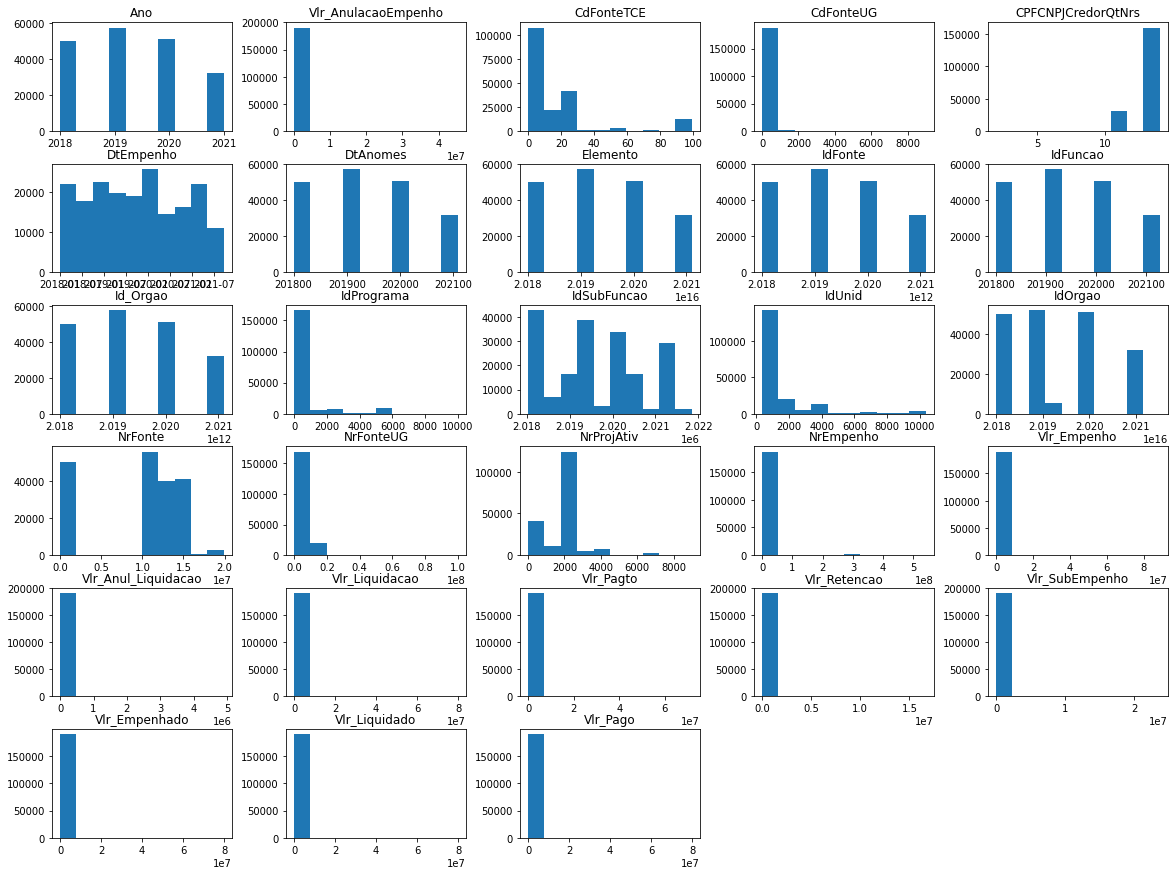

In [37]:
#verificando as distribuições da base treinamento
tce_train.hist(figsize=(20,15), grid=False);

In [38]:
# % dos Contratos mais frequentes
tce_train.Vlr_Pago.value_counts() / tce_train.shape[0]

0.00         0.230782
3000.00      0.004020
6000.00      0.002914
2000.00      0.002710
4000.00      0.002626
               ...   
20653.00     0.000005
32737.50     0.000005
101205.64    0.000005
4785.02      0.000005
9958.00      0.000005
Name: Vlr_Pago, Length: 94640, dtype: float64

In [39]:
#definindo a rotina para retirar acentuação das palavras
def acentoff(texto):
  return unicodedata.normalize('NFKD', texto).encode('ASCII', 'ignore').decode('ASCII')

In [40]:
def acentoff2(words):
    wordlist = []
    for word in words.split():
        new = acentoff(word)
        new = re.sub(r'[^\w\a]',"", new)
        if new != "":
            wordlist.append(new.upper())
    return wordlist

In [41]:
def process(words):
    words = acentoff2(words)
    return ' '.join(words)

In [42]:
#retirando acentos e tornando maiúsculas
for col in tce_train.select_dtypes('string').columns: #filtrando/restringindo a execução
    tce_train[col] = tce_train.apply(lambda row: process(row[col]), axis=1)

C:\Users\Ivson\AppData\Local\Temp\ipykernel_5524\2401259455.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tce_train[col] = tce_train.apply(lambda row: process(row[col]), axis=1)
C:\Users\Ivson\AppData\Local\Temp\ipykernel_5524\2401259455.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tce_train[col] = tce_train.apply(lambda row: process(row[col]), axis=1)
C:\Users\Ivson\AppData\Local\Temp\ipykernel_5524\2401259455.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [43]:
tce_train.select_dtypes('object')

,IdEmpenho,CNPJRaiz,CPFCNPJCredor,Credor,DEFonteTCE,DEFonteUG,DEPrograma,DEProjAtiv,ElemDespesaTCE,ElemDespesaUG,...,Funcao,Historico,IdContrato,NrLicitacao,ProgTrab,ProgTrabRed,ProjAtiv,SubFuncao,Tp_Empenho,Unidade
247929,202000200036300060000002202,00000000,00000000000191,BANCO DO BRASIL SA,RECURSOS ORDINARIOS,RECURSOS ORDINARIOS,GESTAO MANUTENCAO E SERVICOS DO MUNICIPIO,MANUTENCAO DA SECRETARIA,OUTROS SERVICOS DE TERCEIROS PESSOA JURIDICA,OUTROS SERV DE TERCEIROSPESJURIDI,...,ADMINISTRACAO,PRESTACAO DE SERVICOS FINANCEIROS PARA ARRECAD...,0003630872020,2019021268,206412920422002339039002,206412920422002,20200036320022041290204,ADMINISTRACAO DE RECEITAS,ESTIMATIVO,PREFEITURA ANGRA DOS REIS
247930,202100200036300060000000368,00000000,00000000000191,BANCO DO BRASIL SA,RECURSOS ORDINARIOS,RECURSOS ORDINARIOS,GESTAO MANUTENCAO E SERVICOS DO MUNICIPIO,MANUTENCAO DA SECRETARIA,OUTROS SERVICOS DE TERCEIROS PESSOA JURIDICA,OUTROS SERVICOS DE TERCEIROSPESSOA JURIDICA,...,ADMINISTRACAO,CHAMAMENTO PUBLICO 012020SFI PROC 2019021268 S...,0003630872020,2019021268,206412920422002339039992,206412920422002,20210036320022041290204,ADMINISTRACAO DE RECEITAS,ESTIMATIVO,PREFEITURA ANGRA DOS REIS
248030,202000200036300060000002205,00360305,00360305000104,CAIXA ECONOMICA FEDERAL,RECURSOS ORDINARIOS,RECURSOS ORDINARIOS,GESTAO MANUTENCAO E SERVICOS DO MUNICIPIO,MANUTENCAO DA SECRETARIA,OUTROS SERVICOS DE TERCEIROS PESSOA JURIDICA,OUTROS SERV DE TERCEIROSPESJURIDI,...,ADMINISTRACAO,PRESTACAO DE SERVICOS FINANCEIROS PARA ARRECAD...,0003630842020,2019021268,206412920422002339039002,206412920422002,20200036320022041290204,ADMINISTRACAO DE RECEITAS,ESTIMATIVO,PREFEITURA ANGRA DOS REIS
248032,202100200036300060000000377,00360305,00360305000104,CAIXA ECONOMICA FEDERAL,RECURSOS ORDINARIOS,RECURSOS ORDINARIOS,GESTAO MANUTENCAO E SERVICOS DO MUNICIPIO,MANUTENCAO DA SECRETARIA,OUTROS SERVICOS DE TERCEIROS PESSOA JURIDICA,OUTROS SERVICOS DE TERCEIROSPESSOA JURIDICA,...,ADMINISTRACAO,CHAMAMENTO PUBLICO 012020SFI PROC 2019021268 S...,0003630842020,2019021268,206412920422002339039992,206412920422002,20210036320022041290204,ADMINISTRACAO DE RECEITAS,ESTIMATIVO,PREFEITURA ANGRA DOS REIS
248155,201800200036300060000002868,00394460,00394460010708,MINISTRIO DA FAZENDA,ORDINARIOS,ORDINARIOS,GESTAO MANUTENCAO E SERVICOS DO MUNICIPIO,MANUTENCAO DA SECRETARIA,OBRIGACOES TRIBUTARIAS E CONTRIBUTIVAS,OBRIGACOES TRIBUTARIAS CONTRIBUTIVAS,...,ADMINISTRACAO,MM 2192018SFIDPTES PAGAMENTO DE CONTRIBUICAO D...,0003630072015,53502014,206412920422002339047000,206412920422002,20180036320022041290204,ADMINISTRACAO DE RECEITAS,ORDINARIO,PREFEITURA ANGRA DOS REIS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1862853,202100071035507050000000044,24398209,24398209700,DELSON RODRIGUES FRANCO,RECURSOS ORDINARIOS,IMPOSTOS E TRANSFERENCIAS DE I,EDUCACAO,MANUTENCAO E REVITALIZACAO DO ENSINO FUNDAMENTAL,OUTROS SERVICOS DE TERCEIROS PESSOA FISICA,OUTROS SERVICOS DE TERCEIROS PESSOA FISICA,...,EDUCACAO,LOCACAO DE IMOVEL PARA ATENDER AS NECESSIDADES...,010355002A2021,0,7705123619263390360030,770512361926,20211035500062123610009,ENSINO FUNDAMENTAL,GLOBAL,FUN MUNI DE EDUCACAO DE ITALVA
1862856,202100071035507050000000054,27429180,27429180787,SEBASTIAO MOREIRA DEVESA,OUTRAS TRANSFERENCIAS DE RECURSOS DO FNDE,TRANSFERENCIAS RECURSOS FNDE,NUTRICAO ESCOLAR,AQUISICAO DE GENEROS ALIMENTICIOS PARA MANUTEN...,MATERIAL DE CONSUMO,MATERIAL DE CONSUMO,...,EDUCACAO,OVOS DE GALINHACOM REGISTRO DO SIM VALIDADE SU...,0103550062021,050000362021,77051230610293390300035,7705123061029,20211035500092123060010,ALIMENTACAO E NUTRICAO,ORDINARIO,FUN MUNI DE EDUCACAO DE ITALVA
1862879,202100071035507050000000042,30170134,30170134000111,WANDERSON MENDES AZEVEDO,ROYALTIES VINCULADOS A EDUCACAOART 2O DA LEI N...,ROYALTIES LEI 128582013,EDUCACAO,MANUTENCAO E REVITALIZACAO DO ENSINO FUNDAMENTAL,MATERIAL DE CONSUMO,MATERIAL DE CONSUMO,...,EDUCACAO,CONTRATACAO DE EMPRESA PARA FORNECIMENTO DE 

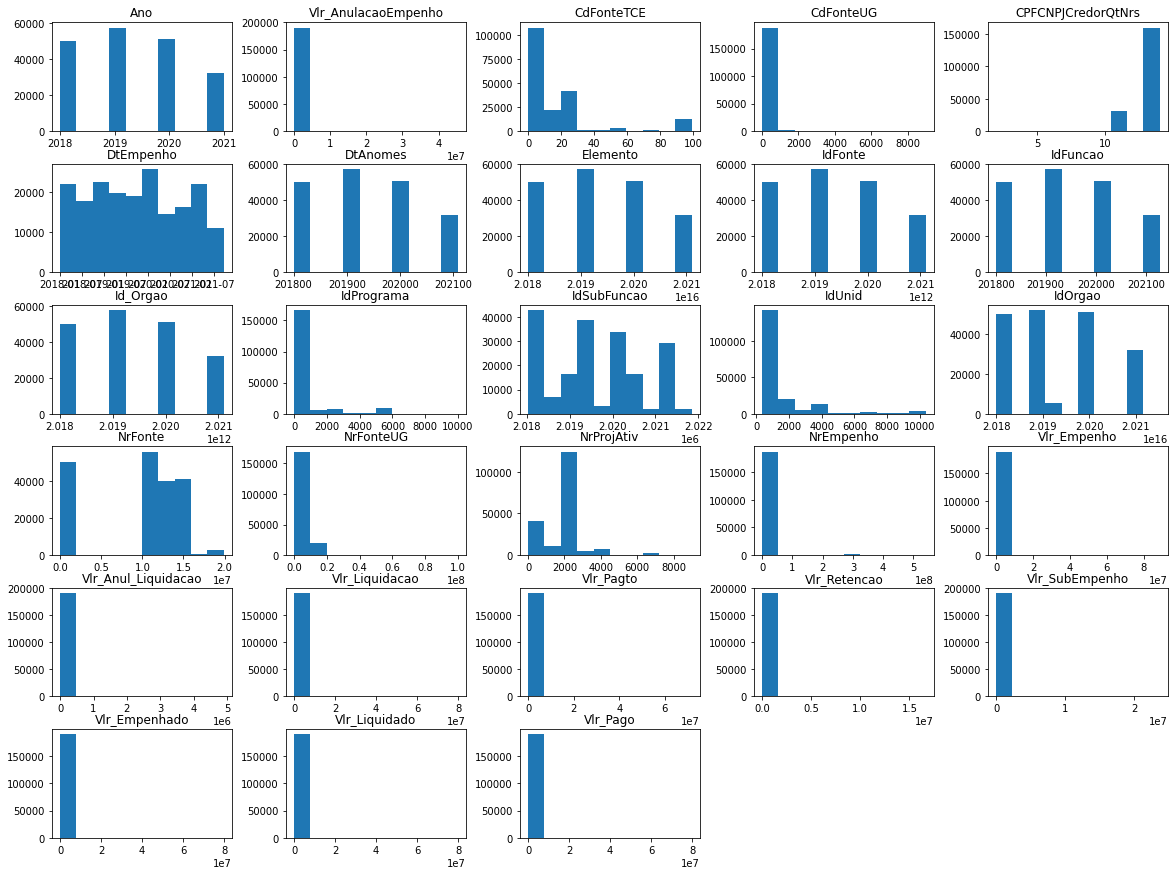

In [44]:
#verificando as distribuições da base treinamento
tce_train.hist(figsize=(20,15), grid=False);

In [47]:
#gravando dataframes para facilitar a recuperação
tce_clean.to_csv('tce_clean.csv', sep=';', index=True)
tce_train.to_csv('tce_train.csv', sep=';', index=True)
tce_train.to_csv(r'tce_train.txt', sep=';', index=True)

####1.4. Pandas Profiling

In [48]:
#impontando o Pandas Profiling
from pandas_profiling import ProfileReport

In [49]:
#criando o ProfileReport
tce_report_clean = ProfileReport(tce_clean)
tce_report_train = ProfileReport(tce_train)

In [50]:
#pip install pandas-profiling[notebook]

In [51]:
#pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [52]:
#pip install ipywidgets

In [53]:
from typing import List
from ipywidgets import HTML, Button, widgets
from pandas_profiling.report.presentation.core import Alerts
from pandas_profiling.report.presentation.flavours.html import templates
from pandas_profiling.report.presentation.flavours import WidgetReport
from IPython import display

In [54]:
profile_clean = ProfileReport(tce_clean, minimal=True)
profile_clean.to_file("tce_clean.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 40.52it/s]


In [55]:
profile_train = ProfileReport(tce_train, minimal=True)
profile_train.to_file("tce_train.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 38.49it/s]


In [12]:
import pandas as pd
tce_train_df = pd.read_csv('tce_train.csv', sep=';')
tce_train_df.shape

C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (8,37) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(190773, 51)

In [13]:
tce_train_df.head()

,Unnamed: 0,IdEmpenho,Ano,Vlr_AnulacaoEmpenho,CdFonteTCE,CdFonteUG,CNPJRaiz,CPFCNPJCredorQtNrs,CPFCNPJCredor,Credor,...,Unidade,Vlr_Empenho,Vlr_Anul_Liquidacao,Vlr_Liquidacao,Vlr_Pagto,Vlr_Retencao,Vlr_SubEmpenho,Vlr_Empenhado,Vlr_Liquidado,Vlr_Pago
0,247929,202000200036300060000002202,2020,29498.60,0,2,0,14,191,BANCO DO BRASIL SA,...,PREFEITURA ANGRA DOS REIS,30000.00,0.0,501.40,501.40,0.0,0.0,501.40,501.40,501.40
1,247930,202100200036300060000000368,2021,0.00,0,2,0,14,191,BANCO DO BRASIL SA,...,PREFEITURA ANGRA DOS REIS,100000.00,0.0,24120.06,24120.06,0.0,0.0,100000.00,24120.06,24120.06
2,248030,202000200036300060000002205,2020,15589.18,0,2,360305,14,360305000104,CAIXA ECONOMICA FEDERAL,...,PREFEITURA ANGRA DOS REIS,15850.00,0.0,260.82,260.82,0.0,0.0,260.82,260.82,260.82
3,248032,202100200036300060000000377,2021,0.00,0,2,360305,14,360305000104,CAIXA ECONOMICA FEDERAL,...,PREFEITURA ANGRA DOS REIS,100000.00,0.0,91921.97,91921.97,0.0,0.0,100000.00,91921.97,91921.97
4,248155,201800200036300060000002868,2018,0.00,0,0,394460,14,394460010708,MINISTRIO DA FAZENDA,...,PREFEITURA ANGRA DOS REIS,588497.89,0.0,588497.89,588497.89,0.0,0.0,588497.89,588497.89,588497.89


In [15]:
tce_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190773 entries, 0 to 190772
Data columns (total 51 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           190773 non-null  int64  
 1   IdEmpenho            190773 non-null  object 
 2   Ano                  190773 non-null  int64  
 3   Vlr_AnulacaoEmpenho  190773 non-null  float64
 4   CdFonteTCE           190773 non-null  int64  
 5   CdFonteUG            190773 non-null  int64  
 6   CNPJRaiz             190773 non-null  int64  
 7   CPFCNPJCredorQtNrs   190773 non-null  int64  
 8   CPFCNPJCredor        190773 non-null  object 
 9   Credor               190773 non-null  object 
 10  DtEmpenho            190773 non-null  object 
 11  DEFonteTCE           190773 non-null  object 
 12  DEFonteUG            190772 non-null  object 
 13  DEPrograma           190754 non-null  object 
 14  DEProjAtiv           190773 non-null  object 
 15  DtAnomes         